# Section 1

**1.1**

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [58]:
# Loading the dataset from train.csv into a dataframe named titanic_data.
titanic_data = pd.read_csv('train.csv')

In [59]:
# Made a copy of the original dataframe.
titanic_data_copy = pd.read_csv('train.csv')

In [60]:
# Checked to make sure the Dataframe loaded properly.
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
titanic_data.shape

(891, 12)

In [62]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Section 2

**2.1**

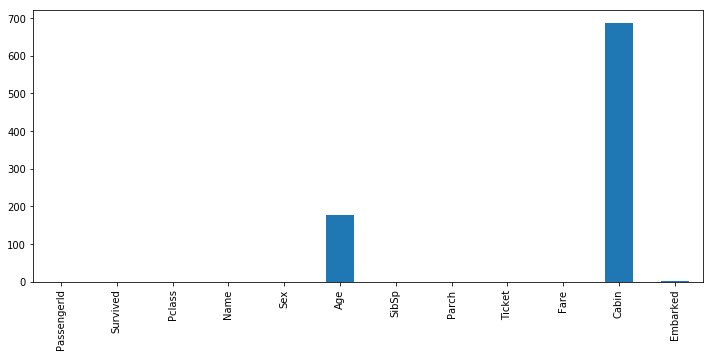

In [63]:
# Found the null values for each column and found the total amount of null values for each column.
# I think put that data into a bar graph
titanic_data.isnull().sum().plot(kind='bar', figsize=(12,5));

**2.2**

In [64]:
# Printed the sum of the null values in the Cabin column.
print('The sum of null values in the Cabin column:', titanic_data['Cabin'].isnull().sum())

The sum of null values in the Cabin column: 687


**2.3**

In [65]:
# Used the dropna function to remove rows with null values in the 'Enbarked' column.
titanic_data = titanic_data.dropna(subset=['Embarked'])

**2.4**

In [66]:
# Used the fillna to replace null values in the 'Cabin' column with '¯\(ツ)/¯'.
titanic_data['Cabin'] = titanic_data['Cabin'].fillna('¯\(ツ)/¯')

# Section 3

**3.1**

In [67]:
# I created a new column in the titanic_data Data frame called 'family_count',
# which is the sum of the Sibling/Spouses ['SibSp] column and the Parents/Children ['Parch] column.
titanic_data['family_count'] = titanic_data['SibSp'] + titanic_data['Parch']

**3.2**

In [68]:
# I created a function called isreverend to determine if a given name is a reverend.
def isreverend(name):
    if name.split()[1] == 'Rev.':
        return 1
    else:
        return 0

In [69]:
# I applied the isreverend function to my titanic_data dataframe to create a new column called 'is_reverend'.
titanic_data['is_reverend'] = titanic_data['Name'].apply(isreverend)

**3.3**

In [70]:
# I created a function to extract titles from the name column of the data frame.

def title_extracter(name):
    # The name is split first by comma. Then the index[1] result of the initial split, is split by spaces.
    # The function then checks if the index [0] result of the secondary split is 'the'.
    # If the index[0] result does not equal 'the', the index[0] result of the secondary split is returned.
    if name.split(',')[1].split()[0] != 'the':
        return name.split(',')[1].split()[0]
    
    # If the index[0] result of the secondary split does equal 'the',
    # the function returns the index[1] result of the secondary split (i.e. it selects the following word.).
    if name.split(',')[1].split()[0] == 'the':
        return name.split(',')[1].split()[1]

In [71]:
# I applied the title_extracter function to the dataframe to create a new column named ['title']
titanic_data['title'] = titanic_data['Name'].apply(title_extracter)

In [72]:
# This creates three columns from the 'Embarked' column based on the unique variables in 'Embarked'.
# 'Embarked_C' says whether a passenger embarked from Cherbourg (0=False, 1=True)
# 'Embarked_Q' says whether a passenger embarked from Queenstown (0=False, 1=True)
# 'Embarked_S' says whether a passenger embarked from Southampton (0=False, 1=True)
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'])

# This creats two columns from the Sex column. 'Sex_male' and 'Sex_female'.
titanic_data = pd.get_dummies(titanic_data, columns=['Sex'])

# This creats 17 columns from the title column based on unique titles in the dataset.
titanic_data = pd.get_dummies(titanic_data, columns=['title'])

# Section 4

**4.1**

In [73]:
# The Overall Survival Rate is found by taking the mean of the 'Survived' column.
# The closer to 1 the mean is, the higher the survival rate.
print('The overall survival rate for passengers on the Titanic:', titanic_data['Survived'].mean())

The overall survival rate for passengers on the Titanic: 0.38245219347581555


**4.2**

The female passengers on the Titanic are represented by a 'Sex_male' value of 0 
The male passengers are represented by 'Sex_male' value of 1

Calculated Survival Rate: Sex_male
0    0.740385
1    0.188908
Name: Survived, dtype: float64 

Men overall fared worse on the Titanic with a survival rate of 18.9%, compared to women overall who had a survival rate of 74%


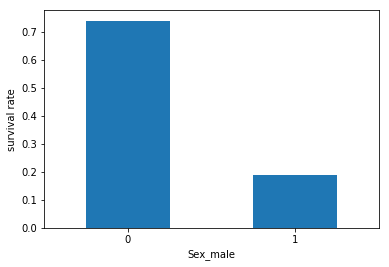

In [127]:
# Created a bar graph of the mean of the Survived column grouped by Sex.
titanic_data.groupby('Sex_male')['Survived'].mean().plot(kind='bar', rot=0);
plt.ylabel('survival rate');

print("The female passengers on the Titanic are represented by a 'Sex_male' value of 0 \nThe male passengers are represented by 'Sex_male' value of 1\n")

print('Calculated Survival Rate:', titanic_data.groupby('Sex_male')['Survived'].mean(), '\n')

print('Men overall fared worse on the Titanic with a survival rate of 18.9%, compared to women overall who had a survival rate of 74%')

**4.3**

First class passengers are represented by a value of 1, 
Second class passengers by a value 2, 
and Third class passengers by a value of 3.

Pclass
1    62.616822
2    47.282609
3    24.236253
Name: Survived, dtype: float64 

First class passengers had a survival rate of 62.6%, 
Second class passengers had a survival rate of 47.3%, 
Third class passengers had a survival rate of 24.2%.
Third class passengers fared the worst of any passenger class.


Text(0,0.5,'Survival rate')

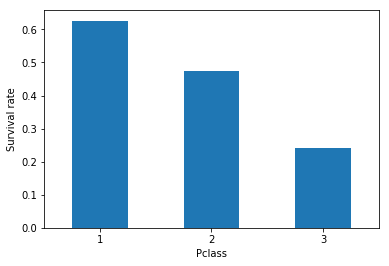

In [128]:
# Created a bar graph of the mean of the Survived column grouped by Passenger Class ['Pclass'].

print('First class passengers are represented by a value of 1, \nSecond class passengers by a value 2, \nand Third class passengers by a value of 3.\n')

print(titanic_data.groupby('Pclass')['Survived'].mean() * 100, '\n')

print('First class passengers had a survival rate of 62.6%, \nSecond class passengers had a survival rate of 47.3%, \nThird class passengers had a survival rate of 24.2%.\nThird class passengers fared the worst of any passenger class.')

titanic_data.groupby('Pclass')['Survived'].mean().plot(kind='bar', rot=0);
plt.ylabel('Survival rate');

**4.4**

In [104]:
# Created a dataframe of reverends on board the Titanic.
reverends_on_the_titanic = titanic_data.loc[(titanic_data['is_reverend'] == 1), :]

In [109]:
reverends_on_the_titanic['Survived'].sum()

0

In [116]:
# Counted the number of reverens in the data frame.
rev_onboard = reverends_on_the_titanic['Survived'].count()

# Added the values of the 'Survived' column together to calculate the number of reverends that survived.
rev_survived = reverends_on_the_titanic['Survived'].sum()
print(f'Out of {rev_onboard} reverends on board {rev_survived} survived.')

Out of 6 reverends on board 0 survived.


**4.5**

In [119]:
# Filtered the titanic data frame by setting Cabin == '¯\(ツ)/¯' and found the mean survival rate.
unkn_cabin = (titanic_data.loc[(titanic_data['Cabin'] == '¯\(ツ)/¯'), :]['Survived'].mean())
print(f"The survival rate for people in cabins that have a value '¯\(ツ)/¯': {unkn_cabin}",)

The survival rate for people in cabins that have a value '¯\(ツ)/¯': 0.29985443959243085


**4.6**

In [122]:
# Filtered for passengers with null values for their age and found the mean survival rate.
ageless_survival = titanic_data.loc[(titanic_data['Age'].isnull()), :]['Survived'].mean()
print(f"The survival rate for people with null values for 'Age': {ageless_survival}")

The survival rate for people with null values for 'Age': 0.2937853107344633


**4.7**

Passengers who embarked from Cherbourg are represented by the value C.
Passengers who embarked from Queenstown are represented by the value Q.
Passengers who embarked from Southampton are represented by the value S.

Table of survival rate based on point of embarkation
 Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64 

The survival rate of passengers who embarked from Cherbourg is 55.4%
The survival rate of passengers who embarked from Queenstown is 39.0%
The survival rate of passengers who embarked from Southampton is 33.7%



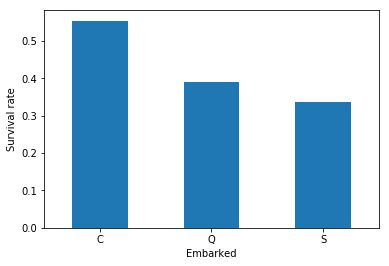

In [143]:
# I used the copy of the titanic data frame to be able to use the groupby function on the 'Embarked' column.
# Grouped passengers by point of Embarkation and found the mean survival.

print('Passengers who embarked from Cherbourg are represented by the value C.')
print('Passengers who embarked from Queenstown are represented by the value Q.')
print('Passengers who embarked from Southampton are represented by the value S.\n')

print('Table of survival rate based on point of embarkation\n', titanic_data_copy.groupby('Embarked')['Survived'].mean() * 100, '\n')

print('The survival rate of passengers who embarked from Cherbourg is 55.4%')

print('The survival rate of passengers who embarked from Queenstown is 39.0%')

print('The survival rate of passengers who embarked from Southampton is 33.7%\n')

titanic_data_copy.groupby('Embarked')['Survived'].mean().plot(kind='bar', rot=0);
plt.ylabel('Survival rate');

**4.8**

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64


Text(0,0.5,'Survival rate')

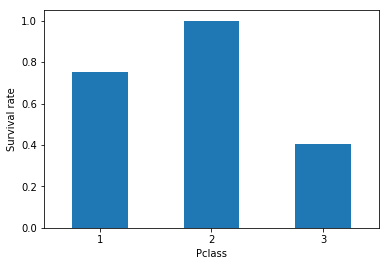

In [142]:
# Filtered my dataframe for passengers under the age of 12 and then used groupby to group based on passenger class.
# I then found the mean survival for each group and plotted it.
print(titanic_data.loc[((titanic_data['Age'] < 12)), :].groupby('Pclass')['Survived'].mean())
titanic_data.loc[((titanic_data['Age'] < 12)), :].groupby('Pclass')['Survived'].mean().plot(kind='bar', rot=0);
plt.ylabel('Survival rate');

**4.9**

In [130]:
# I filted for passengers with the title of captain to look at the name and fate of the passengers with captain as their title.
# The Titanic captains name was Edward John Smith.
# The individual in the dataframe with capt as a title was not the captain of the Titanic.
titanic_data.loc[(titanic_data['title_Capt.'] == 1), ('Name', 'Survived')]

,Name,Survived
745,"Crosby, Capt. Edward Gifford",0


In [83]:
# I filted the data frame for passengers with the name smith
titanic_data.loc[titanic_data['Name'].str.contains('Smith'), ('Name', 'Survived')]

,Name,Survived
174,"Smith, Mr. James Clinch",0
260,"Smith, Mr. Thomas",0
284,"Smith, Mr. Richard William",0
346,"Smith, Miss. Marion Elsie",1


The captain of the ship was Capt. Edward John Smith, who did die when the Titanic sank, but he is not on the list. This is a list of passengers and therefore excludes crew members. There was one passenger who held the rank of captain, who incidently did not survive the sinking of the Titanic.

**4.10**

In [131]:
# I filted for the name and fare price columns of passengers who died.
# I sorted the Fare values in Descending order to find passengers who did not survive and paid the most.
titanic_data.loc[(titanic_data['Survived'] == 0), (['Fare', 'Name'])].sort_values(by=['Fare'], ascending=False).head(2)

,Fare,Name
27,263.0,"Fortune, Mr. Charles Alexander"
438,263.0,"Fortune, Mr. Mark"


The max fare paid by a passenger who died was $263.00. 
Two deceased passengers purchased tickets for $263; Charles Alexander Fortune and Mark Fortune.

This graph shows the max fare price for passengers in the deceased (0) or the survived (1) groups


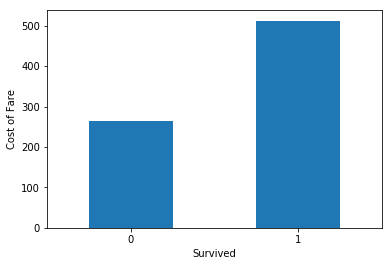

In [140]:
print('The max fare paid by a passenger who died was $263.00. \nTwo deceased passengers purchased tickets for $263; Charles Alexander Fortune and Mark Fortune.\n')

print('This graph shows the max fare price for passengers in the deceased (0) or the survived (1) groups')

titanic_data.groupby('Survived')['Fare'].max().plot(kind='bar', rot=0);
plt.ylabel('Cost of Fare');

**4.11**

In [134]:
# Calculated the mean survival rate of passengers without family on board. 
survival_rate_without_family = titanic_data.loc[(titanic_data['family_count'] == 0), :]['Survived'].mean()

# Calculated the mean survival rate of passengers with any family on board.
survival_rate_with_family = titanic_data.loc[(titanic_data['family_count'] != 0), :]['Survived'].mean()

print(f'The survival rate for passengers with no family {survival_rate_without_family}:')
print(f'The survival rate for passengers with family {survival_rate_with_family}:\n')

The survival rate for passengers with no family 0.30093457943925234:
The survival rate for passengers with family 0.5056497175141242:



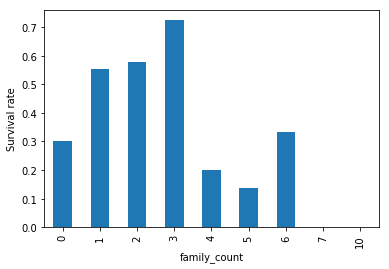

In [139]:
# ploted the the mean survival rates for passengers based on the number of family members they had on baord the Titanic.
titanic_data.groupby('family_count')['Survived'].mean().plot(kind='bar');
plt.ylabel('Survival rate');

Overall, have family is correlated with an increased survival rate.

# Section 5

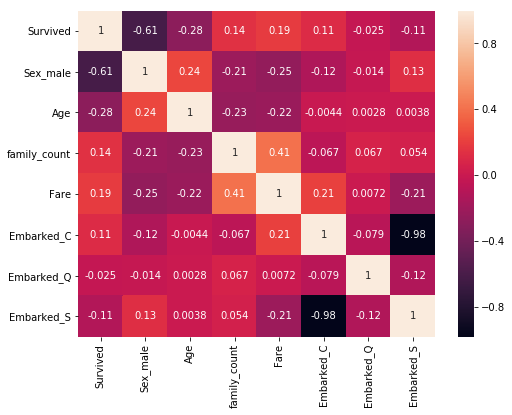

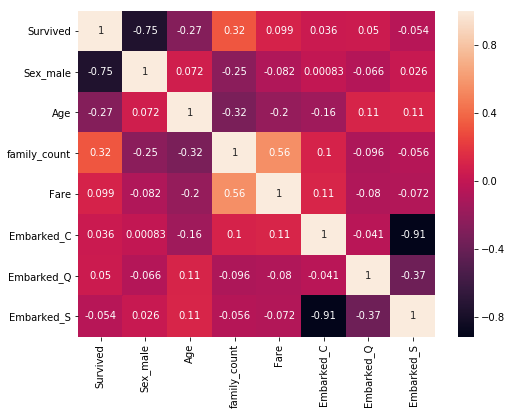

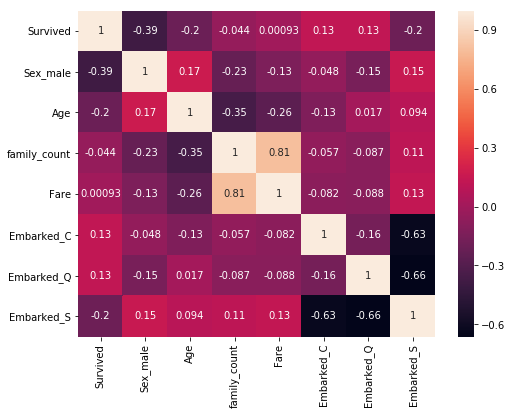

In [88]:
# I created a heatmap of correlation values for each passenger class.

# First Class Passengers
plt.figure(figsize=(8,6))
sns.heatmap(titanic_data.loc[(titanic_data['Pclass'] == 1)]
            [['Survived', 'Sex_male', 
                          'Age', 'family_count', 
                          'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].corr(), annot=True);

# Second Class Passengers
plt.figure(figsize=(8,6))
sns.heatmap(titanic_data.loc[(titanic_data['Pclass'] == 2)]
            [['Survived', 'Sex_male', 
                          'Age', 'family_count', 
                          'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].corr(), annot=True);

# Third Class Passengers
plt.figure(figsize=(8,6))
sns.heatmap(titanic_data.loc[(titanic_data['Pclass'] == 3)]
            [['Survived', 'Sex_male', 
                          'Age', 'family_count', 
                          'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].corr(), annot=True);

**Gender and Survival**

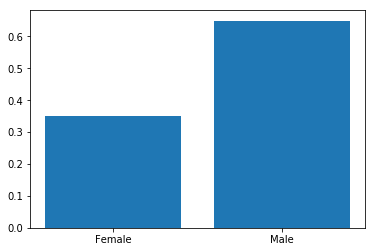

In [89]:
# Created a bar graph of the gender make up of the passengers on the Titanic.
gender = ['Male', 'Female']

percent_male = (titanic_data['Sex_male'] == 1).sum() / (titanic_data['Sex_male'].count())
percent_female = (titanic_data['Sex_male'] == 0).sum() / (titanic_data['Sex_male'].count())

percentages = [percent_male, percent_female]

passenger_gender_percentages = plt.figure()
plt.bar(gender, percentages);
plt.ylabel('Percent of total passengers')

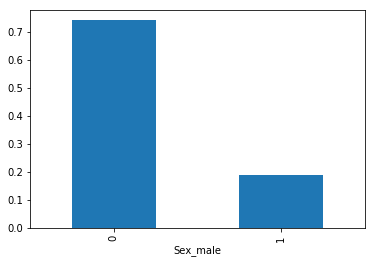

In [90]:
# Plot of survival rate based on gender.
survival_rate_by_gender = plt.figure()

(titanic_data.groupby('Sex_male')['Survived'].mean()).plot(kind='bar');

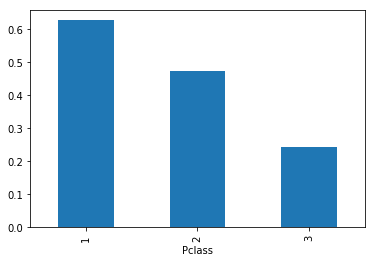

In [91]:
# Survival rate based on class.
(titanic_data.groupby('Pclass')['Survived'].mean()).plot(kind='bar');

**Passenger Class and Gender**

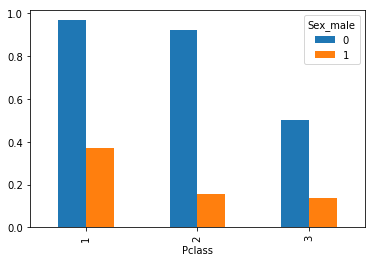

In [92]:
# created a plot that shows the survival rate grouped by both passenger class and gender.
(titanic_data.groupby(['Pclass', 'Sex_male'])['Survived'].mean().unstack()).plot(kind='bar');

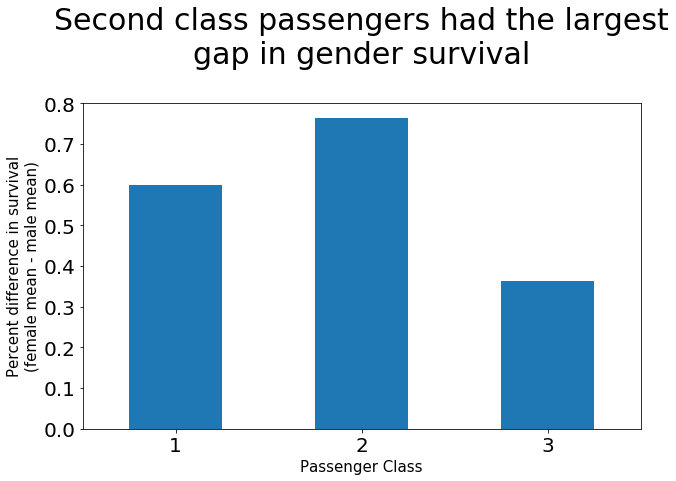

In [93]:
# created a new dataframe survival rate based on class and gender
gender_class_df = titanic_data.groupby(['Pclass', 'Sex_male'])['Survived'].mean().unstack()

# Renamed the columns to represent what the 0 and 1 stand for
gender_class_df.rename(columns={0:'female', 1:'male'}, inplace=True)

# Created a new column that is the difference between the survival rate between female and male passengers.
gender_class_df['gender_survival_delta'] = gender_class_df['female'] - gender_class_df['male']

# Created a plot.
plt.figure(figsize=(10,6))
gender_class_df['gender_survival_delta'].plot(kind='bar', rot=0);
plt.title('Second class passengers had the largest\ngap in gender survival\n', fontsize=30);
plt.xlabel('Passenger Class', fontsize=15);
plt.xticks(fontsize=20);
plt.ylabel('Percent difference in survival\n(female mean - male mean)', fontsize=15);
plt.yticks(fontsize=20);

In [94]:
no_family = titanic_data.loc[(titanic_data['family_count'] == 0)]
family = titanic_data.loc[(titanic_data['family_count'] != 0)]

In [95]:
no_family = titanic_data['family_count'] == 0

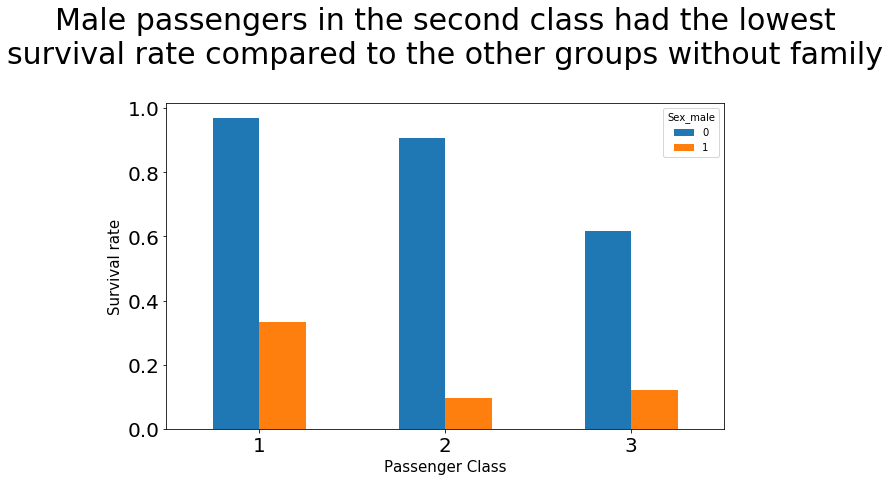

In [96]:
titanic_data.loc[no_family].groupby(['Pclass', 'Sex_male'])['Survived'].mean().unstack().plot(kind='bar', figsize=(10,6), rot=0);
plt.title('Male passengers in the second class had the lowest\nsurvival rate compared to the other groups without family\n', fontsize=30);
plt.xlabel('Passenger Class', fontsize=15);
plt.xticks(fontsize=20);
plt.ylabel('Survival rate', fontsize=15);
plt.yticks(fontsize=20);

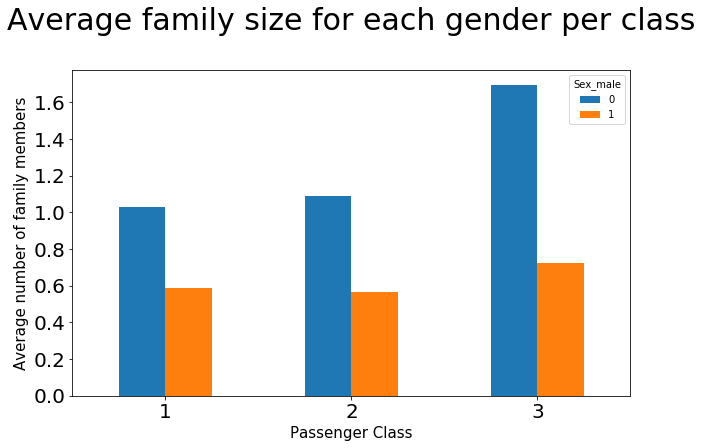

In [97]:
titanic_data.groupby(['Pclass', 'Sex_male'])['family_count'].mean().unstack().plot(kind='bar', figsize=(10,6), rot=0);
plt.title('Average family size for each gender per class\n', fontsize=30);
plt.xlabel('Passenger Class', fontsize=15);
plt.xticks(fontsize=20);
plt.ylabel('Average number of family members', fontsize=15);
plt.yticks(fontsize=20);

Text(0.5,1,'Men who survived in second class had a family size of 2 or more.')

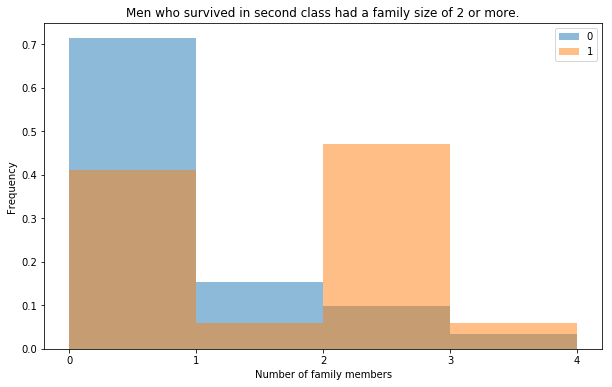

In [98]:
male_died_second_class_family_dist = (titanic_data.loc[((titanic_data['Sex_male'] == 1) & (titanic_data['Survived'] == 0) & (titanic_data['Pclass'] == 2)), 'family_count'])
male_died_second_class_family_dist = male_died_second_class_family_dist.rename(columns={'family_count': 'num_family_deceased'})

male_survived_second_class_family_dist = (titanic_data.loc[((titanic_data['Sex_male'] == 1) & (titanic_data['Survived'] == 1) & (titanic_data['Pclass'] == 2)), 'family_count'])
male_survived_second_class_family_dist = male_survived_second_class_family_dist.rename(columns={'family_count': 'num_family_survived'})

second_class_male_family_dist = pd.concat((male_died_second_class_family_dist, male_survived_second_class_family_dist), axis=1)

second_class_male_family_dist.plot.hist(normed=True, alpha=0.5, bins=[0,1,2,3,4], figsize=(10,6));
plt.xlabel('Number of family members')
plt.xticks([0,1,2,3,4])
plt.title('Men who survived in second class had a family size of 2 or more.')

In [99]:
first_class_men = (titanic_data['Pclass'] == 1) & (titanic_data['Sex_male'] == 1)
second_class_men = (titanic_data['Pclass'] == 2) & (titanic_data['Sex_male'] == 1)
third_class_men = (titanic_data['Pclass'] == 3) & (titanic_data['Sex_male'] == 1)

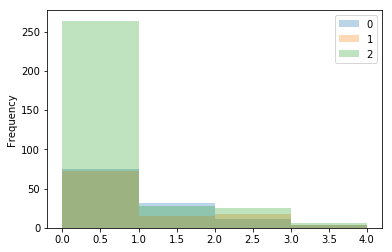

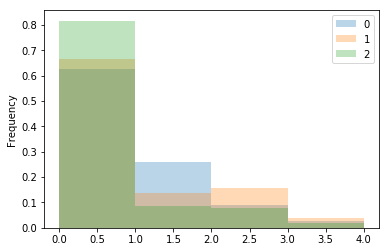

In [100]:
first = titanic_data.loc[first_class_men]['family_count']
first = first.rename(columns={'family_count': 'first'})

second = titanic_data.loc[second_class_men]['family_count']
second = second.rename(columns={'family_count': 'second'})

third = titanic_data.loc[third_class_men]['family_count']
third = third.rename(columns={'family_count': 'third'})


family_count_df = pd.concat((first, second, third), axis=1)

family_count_df.plot.hist(normed=False, alpha=0.3, bins=[0,1,2,3,4])

family_count_df.plot.hist(normed=True, alpha=0.3, bins=[0,1,2,3,4])

In [101]:
men = (titanic_data['Sex_male'] == 1)
men_data = titanic_data.loc[men]

In [102]:
Pclass_male_family_array = []

for i in range(1,4):
    count0 = men_data.loc[(men_data['Pclass'] == i) & (men_data['family_count'] == 0)]['Survived'].count()
    survival_rate0 = count = men_data.loc[(men_data['Pclass'] == i) & (men_data['family_count'] == 0)]['Survived'].mean()
    
    count1 = men_data.loc[(men_data['Pclass'] == i) & (men_data['family_count'] == 1)]['Survived'].count()
    survival_rate1 = count = men_data.loc[(men_data['Pclass'] == i) & (men_data['family_count'] == 1)]['Survived'].mean()
    
    count2 = men_data.loc[(men_data['Pclass'] == i) & (men_data['family_count'] == 2)]['Survived'].count()
    survival_rate2 = count = men_data.loc[(men_data['Pclass'] == i) & (men_data['family_count'] == 2)]['Survived'].mean()
    
    count3 = men_data.loc[(men_data['Pclass'] == i) & (men_data['family_count'] == 3)]['Survived'].count()
    survival_rate3 = count = men_data.loc[(men_data['Pclass'] == i) & (men_data['family_count'] == 3)]['Survived'].mean()
    
    count4 = men_data.loc[(men_data['Pclass'] == i) & (men_data['family_count'] != 0)]['Survived'].count()
    survival_rate4 = count = men_data.loc[(men_data['Pclass'] == i) & (men_data['family_count'] != 0)]['Survived'].mean()
    
    row = {'Pclass': i, 
           'family_count_0': count0,
           'family_count_1': count1,
           'family_count_2': count2,
           'family_count_3': count3,
           'family_count_any_family': count4,
           'survival_rate_0': survival_rate0,
           'survival_rate_1': survival_rate1,
           'survival_rate_2': survival_rate2,
           'survival_rate_3': survival_rate3,
           'survival_rate_any_family': survival_rate4
          }
    Pclass_male_family_array.append(row)   
    
Pclass_male_family_df = pd.DataFrame(Pclass_male_family_array)
Pclass_male_family_df['no_family_delta'] = Pclass_male_family_df['survival_rate_any_family'] - Pclass_male_family_df['survival_rate_0']
Pclass_male_family_df = Pclass_male_family_df.set_index('Pclass')

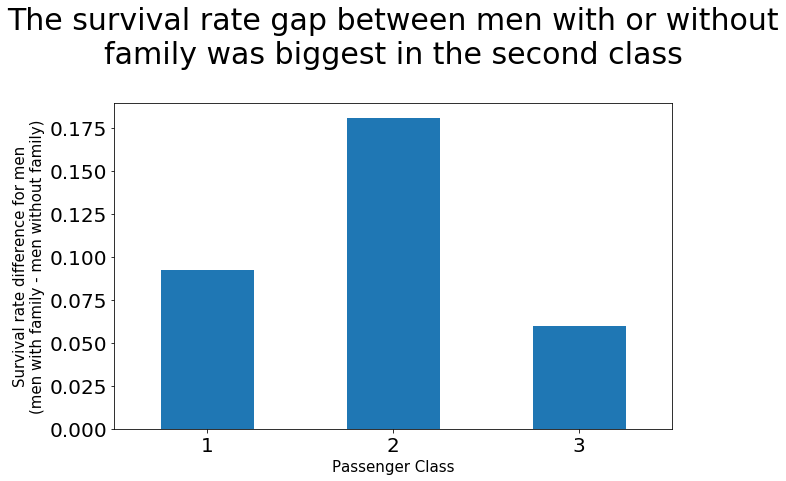

In [103]:
plt.figure(figsize=(10,6))
Pclass_male_family_df['no_family_delta'].plot(kind='bar', rot=0);
plt.title('The survival rate gap between men with or without\nfamily was biggest in the second class\n', fontsize=30);
plt.xlabel('Passenger Class', fontsize=15);
plt.xticks(fontsize=20);
plt.ylabel('Survival rate difference for men\n(men with family - men without family)', fontsize=15);
plt.yticks(fontsize=20);